In [1]:
#pip install graphviz

In [2]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.preprocessing import StandardScaler

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [3]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df = pd.read_csv('../AI_Stocks_Project/Resources/StockAIClean3.csv')
# Review the DataFrame
df.head()

,No.,Ticker,Company,Sector,Mkt Cap Cat,For P/E Cat,Dividend,EPS growth this year (%) Cat,EPS growth next year (%) Cat,EPS growth past 5 years (%) Cat,...,Float Short (%) Cat,Profit Margin (%) Cat,Performance (Year) (%) Cat,Employees Cat,Analyst Rec Cat,Team Rec Cat,Risk,Volume Cat,Var % Cat,Var%
0,1,AAPL,Apple Inc.,Technology,Mg Cap,Med,Yes,Yes,Yes,Yes,...,Lo,Pos,Up,Hi,Buy,Buy,Lo,Hi,Neg,-1.2
1,2,ACN,Accenture plc,Technology,Lg Cap,Med,Yes,Yes,Yes,Yes,...,Lo,Pos,Up,Hi,Buy,Buy,Lo,Med,Pos,5.3
2,3,ADBE,Adobe Inc.,Technology,Lg Cap,Hi,No,Yes,Yes,Yes,...,Lo,Pos,Up,Med,Buy,Buy,Lo,Med,Neg,-0.3
3,4,ADSK,"Autodesk, Inc.",Technology,Lg Cap,Med,No,Yes,Yes,Yes,...,Lo,Pos,Down,Med,Buy,Buy,Lo,Lo,Pos,9.1
4,5,AI,"C3.ai, Inc.",Technology,Mid Cap,Hi,No,No,Yes,No,...,Hi,Neg,Up,Sm,Hold,Hold,Med,Hi,Neg,-36.0


In [4]:
stock_df = pd.get_dummies(df, columns=[ "Analyst Rec Cat", "Risk", "Mkt Cap Cat", "For P/E Cat", "Dividend", "EPS growth this year (%) Cat", "EPS growth next year (%) Cat", "EPS growth past 5 years (%) Cat", "EPS growth next 5 years (%) Cat", "Sales growth past 5 years (%) Cat", "Sales Cat", "Float Short (%) Cat", "Profit Margin (%) Cat", "Performance (Year) (%) Cat", "Employees Cat", "Volume Cat", "Var % Cat"])
stock_df

,No.,Ticker,Company,Sector,Team Rec Cat,Var%,Analyst Rec Cat_Buy,Analyst Rec Cat_Hold,Risk_Hi,Risk_Lo,...,Performance (Year) (%) Cat_Down,Performance (Year) (%) Cat_Up,Employees Cat_Hi,Employees Cat_Med,Employees Cat_Sm,Volume Cat_Hi,Volume Cat_Lo,Volume Cat_Med,Var % Cat_Neg,Var % Cat_Pos
0,1,AAPL,Apple Inc.,Technology,Buy,-1.2,1,0,0,1,...,0,1,1,0,0,1,0,0,1,0
1,2,ACN,Accenture plc,Technology,Buy,5.3,1,0,0,1,...,0,1,1,0,0,0,0,1,0,1
2,3,ADBE,Adobe Inc.,Technology,Buy,-0.3,1,0,0,1,...,0,1,0,1,0,0,0,1,1,0
3,4,ADSK,"Autodesk, Inc.",Technology,Buy,9.1,1,0,0,1,...,1,0,0,1,0,0,1,0,0,1
4,5,AI,"C3.ai, Inc.",Technology,Hold,-36.0,0,1,0,0,...,0,1,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,68,UBER,"Uber Technologies, Inc.",Technology,Hold,12.7,1,0,0,0,...,0,1,0,1,0,1,0,0,0,1
68,69,UPST,"Upstart Holdings, Inc.",Financial,Buy,-68.2,0,1,0,1,...,0,1,0,0,1,1,0,0,1,0
69,70,VERI,"Veritone, Inc.",Technology,Sell,5.8,0,1,1,0,...,1,0,0,0,1,0,1,0,0,1
70,71,VRSK,"Verisk Analytics, Inc.",Industrials,Hold,1.6,1,0,0,0,...,0,1,0,1,0,0,0,1,0,1


In [5]:
stock_clean_df = stock_df.drop(columns=['No.', 'Ticker', 'Sector', 'Company'])
stock_clean_df.head()

,Team Rec Cat,Var%,Analyst Rec Cat_Buy,Analyst Rec Cat_Hold,Risk_Hi,Risk_Lo,Risk_Med,Mkt Cap Cat_Lg Cap,Mkt Cap Cat_Mg Cap,Mkt Cap Cat_Mic Cap,...,Performance (Year) (%) Cat_Down,Performance (Year) (%) Cat_Up,Employees Cat_Hi,Employees Cat_Med,Employees Cat_Sm,Volume Cat_Hi,Volume Cat_Lo,Volume Cat_Med,Var % Cat_Neg,Var % Cat_Pos
0,Buy,-1.2,1,0,0,1,0,0,1,0,...,0,1,1,0,0,1,0,0,1,0
1,Buy,5.3,1,0,0,1,0,1,0,0,...,0,1,1,0,0,0,0,1,0,1
2,Buy,-0.3,1,0,0,1,0,1,0,0,...,0,1,0,1,0,0,0,1,1,0
3,Buy,9.1,1,0,0,1,0,1,0,0,...,1,0,0,1,0,0,1,0,0,1
4,Hold,-36.0,0,1,0,0,1,0,0,0,...,0,1,0,0,1,1,0,0,1,0


In [6]:
# Split the data into features (X) and target (y)
X = stock_clean_df.drop('Team Rec Cat', axis=1)
y = stock_clean_df['Team Rec Cat']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [7]:
# # create a scaler instance
# scaler = StandardScaler()

# # fit/train the scaler
# X_scaler = scaler.fit(X_train)

# # scale the data
# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)


In [8]:
#X.columns

In [9]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [10]:
y_pred = rf.predict(X_test)

In [11]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [12]:
# implement random oversampling
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros = RandomOverSampler(random_state=1)
X_resample, y_resample = ros.fit_resample(X_train, y_train)

Counter(y_resample)
y_resample.value_counts()

Sell    19
Hold    19
Buy     19
Name: Team Rec Cat, dtype: int64

In [13]:
# Fitting the model
rf_model1 = rf.fit(X_resample, y_resample)

In [14]:
# Making predictions using the testing data
rf_predictions1 = rf_model1.predict(X_test)
rf_results1 = pd.DataFrame({"Prediction": rf_predictions1, "Actual": y_test}).reset_index(drop=True)
rf_results1

,Prediction,Actual
0,Buy,Buy
1,Hold,Hold
2,Hold,Hold
3,Sell,Sell
4,Hold,Hold
5,Sell,Sell
6,Buy,Buy
7,Buy,Buy
8,Hold,Hold
9,Buy,Buy


In [15]:
# Display the accuracy score for the test dataset.
rf_score1 = balanced_accuracy_score(y_test, rf_predictions1)
print('Accuracy score: ', rf_score1)

Accuracy score:  1.0


In [16]:
# Generate a confusion matrix for the model
cm = confusion_matrix(y_test, rf_predictions1)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1", "Actual 2"], columns=["Predicted 0", "Predicted 1", "Predicted 2"]
)
display(cm_df)

,Predicted 0,Predicted 1,Predicted 2
Actual 0,8,0,0
Actual 1,0,7,0
Actual 2,0,0,3


In [17]:
print(classification_report(y_test, rf_predictions1))

              precision    recall  f1-score   support

         Buy       1.00      1.00      1.00         8
        Hold       1.00      1.00      1.00         7
        Sell       1.00      1.00      1.00         3

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



In [18]:
# Export the first three decision trees from the forest

# for i in range(3):
#     tree = rf.estimators_[i]
#     dot_data = export_graphviz(tree,
#                                feature_names=X_train.columns,  
#                                filled=True,  
#                                max_depth=2, 
#                                impurity=False, 
#                                proportion=True)
#     graph = graphviz.Source(dot_data)
#     display(graph)
# clf = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=10, min_samples_leaf=5)


# importances = clf.feature_importances_

# dot_data = export_graphviz(clf.columns[0], out_file=None, feature_names=X.columns, class_names=y.column)
# graph = graphviz.Source(dot_data)
# graph.render("tree")

# Random Forests in sklearn will automatically calculate feature importance
importances = rf.feature_importances_
# We can sort the features by their importance
sorted(zip(rf.feature_importances_, X.columns), reverse=True)


[(0.22127768205874424, 'Risk_Med'),
 (0.158541116592995, 'Risk_Lo'),
 (0.15825851141049316, 'Risk_Hi'),
 (0.05156251788855958, 'Var%'),
 (0.03850752185378948, 'Sales Cat_Hi'),
 (0.0302303228751105, 'Employees Cat_Sm'),
 (0.025183083463524512, 'Performance (Year) (%) Cat_Up'),
 (0.024243107906187188, 'For P/E Cat_Low'),
 (0.021617144215748486, 'Sales Cat_Lo'),
 (0.02133500780643214, 'Performance (Year) (%) Cat_Down'),
 (0.018633523864994565, 'Profit Margin (%) Cat_Pos'),
 (0.016818522820254974, 'Mkt Cap Cat_Lg Cap'),
 (0.016567917792412026, 'Profit Margin (%) Cat_Neg'),
 (0.01587628467297344, 'Volume Cat_Hi'),
 (0.0158656579311118, 'Volume Cat_Lo'),
 (0.015340861259164578, 'Mkt Cap Cat_Mid Cap'),
 (0.012136470251628173, 'Sales Cat_Med'),
 (0.008635277773895628, 'EPS growth past 5 years (%) Cat_Yes'),
 (0.00851160533052166, 'Var % Cat_Pos'),
 (0.007587112489944554, 'Analyst Rec Cat_Buy'),
 (0.007484733850121629, 'For P/E Cat_Hi'),
 (0.007446362264689528, 'EPS growth past 5 years (%) Cat_

<AxesSubplot:title={'center':'Features Importances'}, ylabel='1'>

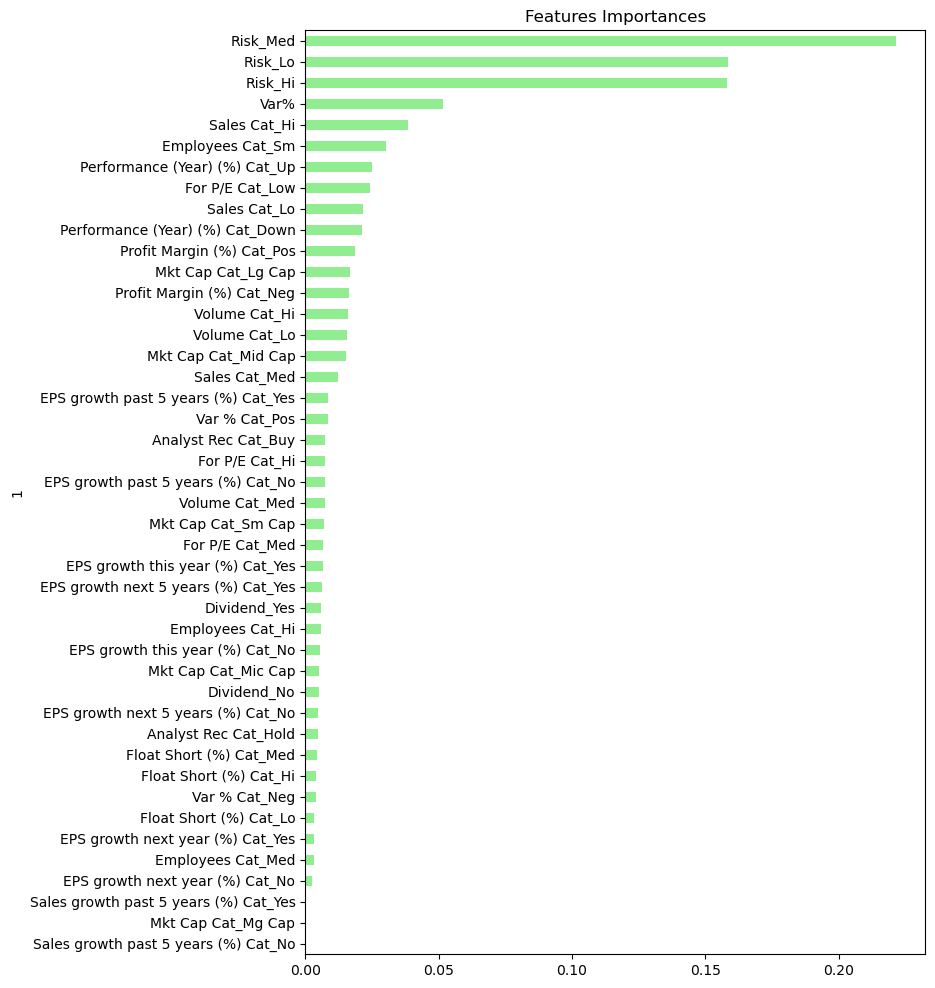

In [19]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model1.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False, figsize=(8,12))


In [20]:
df.columns

Index(['No.', 'Ticker', 'Company', 'Sector', 'Mkt Cap Cat', 'For P/E Cat',
       'Dividend', 'EPS growth this year (%) Cat',
       'EPS growth next year (%) Cat', 'EPS growth past 5 years (%) Cat',
       'EPS growth next 5 years (%) Cat', 'Sales growth past 5 years (%) Cat',
       'Sales Cat', 'Float Short (%) Cat', 'Profit Margin (%) Cat',
       'Performance (Year) (%) Cat', 'Employees Cat', 'Analyst Rec Cat',
       'Team Rec Cat', 'Risk', 'Volume Cat', 'Var % Cat', 'Var%'],
      dtype='object')

BELOW MODEL WITH 6 TOP PARAMETERS PER FEATURE IMPORTANCE

In [35]:
# Based on feature importance results, we will only use top columns for our model
df2 = df[[
    'Var%',
    'Performance (Year) (%) Cat',
    'Risk',
    'Sales Cat',
    'Employees Cat',
    'For P/E Cat',
    'Team Rec Cat'
]]
df2.head()

,Var%,Performance (Year) (%) Cat,Risk,Sales Cat,Employees Cat,For P/E Cat,Team Rec Cat
0,-1.2,Up,Lo,Hi,Hi,Med,Buy
1,5.3,Up,Lo,Hi,Hi,Med,Buy
2,-0.3,Up,Lo,Med,Med,Hi,Buy
3,9.1,Down,Lo,Med,Med,Med,Buy
4,-36.0,Up,Med,Lo,Sm,Hi,Hold


In [38]:
stock_df2 = pd.get_dummies(df2, columns=[ 
    'Performance (Year) (%) Cat',
    'Risk',
    'Sales Cat',
    'Employees Cat',
    'For P/E Cat',
    ])
stock_df2

,Var%,Team Rec Cat,Performance (Year) (%) Cat_Down,Performance (Year) (%) Cat_Up,Risk_Hi,Risk_Lo,Risk_Med,Sales Cat_Hi,Sales Cat_Lo,Sales Cat_Med,Employees Cat_Hi,Employees Cat_Med,Employees Cat_Sm,For P/E Cat_Hi,For P/E Cat_Low,For P/E Cat_Med
0,-1.2,Buy,0,1,0,1,0,1,0,0,1,0,0,0,0,1
1,5.3,Buy,0,1,0,1,0,1,0,0,1,0,0,0,0,1
2,-0.3,Buy,0,1,0,1,0,0,0,1,0,1,0,1,0,0
3,9.1,Buy,1,0,0,1,0,0,0,1,0,1,0,0,0,1
4,-36.0,Hold,0,1,0,0,1,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,12.7,Hold,0,1,0,0,1,1,0,0,0,1,0,1,0,0
68,-68.2,Buy,0,1,0,1,0,0,1,0,0,0,1,1,0,0
69,5.8,Sell,1,0,1,0,0,0,1,0,0,0,1,0,1,0
70,1.6,Hold,0,1,0,0,1,0,0,1,0,1,0,1,0,0


In [52]:
# Split the data into features (X) and target (y)
X = stock_df2.drop('Team Rec Cat', axis=1)
y = stock_df2['Team Rec Cat']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [53]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [54]:
y_pred = rf.predict(X_test)
rf_result = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
rf_result

,Prediction,Actual
0,Hold,Hold
1,Buy,Buy
2,Sell,Sell
3,Hold,Hold
4,Hold,Hold
5,Buy,Buy
6,Buy,Buy
7,Hold,Hold
8,Sell,Sell
9,Buy,Buy


In [42]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [43]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1", "Actual 2"], columns=["Predicted 0", "Predicted 1", "Prediction 2"]
)
# Displaying results
print("Confusion Matrix")
display(cm_df)
print("Classification Report")
print(classification_report(y_test, y_pred))


Confusion Matrix


,Predicted 0,Predicted 1,Prediction 2
Actual 0,5,0,0
Actual 1,0,8,0
Actual 2,0,0,5


Classification Report
              precision    recall  f1-score   support

         Buy       1.00      1.00      1.00         5
        Hold       1.00      1.00      1.00         8
        Sell       1.00      1.00      1.00         5

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



In [44]:
# implement random oversampling
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros = RandomOverSampler(random_state=1)
X_resample, y_resample = ros.fit_resample(X_train, y_train)

Counter(y_resample)
y_resample.value_counts()

Hold    20
Sell    20
Buy     20
Name: Team Rec Cat, dtype: int64

In [51]:
# Fitting the model
rf_model1 = rf.fit(X_resample, y_resample)

In [55]:
# Making predictions using the testing data
rf_predictions1 = rf_model1.predict(X_test)
rf_results1 = pd.DataFrame({"Prediction": rf_predictions1, "Actual": y_test}).reset_index(drop=True)
rf_results1

,Prediction,Actual
0,Hold,Hold
1,Buy,Buy
2,Sell,Sell
3,Hold,Hold
4,Hold,Hold
5,Buy,Buy
6,Buy,Buy
7,Hold,Hold
8,Sell,Sell
9,Buy,Buy


In [59]:
# Display the accuracy score for the test dataset.
rf_score1 = balanced_accuracy_score(y_test, rf_predictions1)
print('Accuracy score: ', rf_score1)

Accuracy score:  1.0


In [60]:
# Generate a confusion matrix for the model
cm = confusion_matrix(y_test, rf_predictions1)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1", "Actual 2"], columns=["Predicted 0", "Predicted 1", "Predicted 2"]
)
display(cm_df)

,Predicted 0,Predicted 1,Predicted 2
Actual 0,7,0,0
Actual 1,0,8,0
Actual 2,0,0,3


In [61]:
print(classification_report(y_test, rf_predictions1))

              precision    recall  f1-score   support

         Buy       1.00      1.00      1.00         7
        Hold       1.00      1.00      1.00         8
        Sell       1.00      1.00      1.00         3

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

